# Predict Stocks using Monte Carlo Simulation

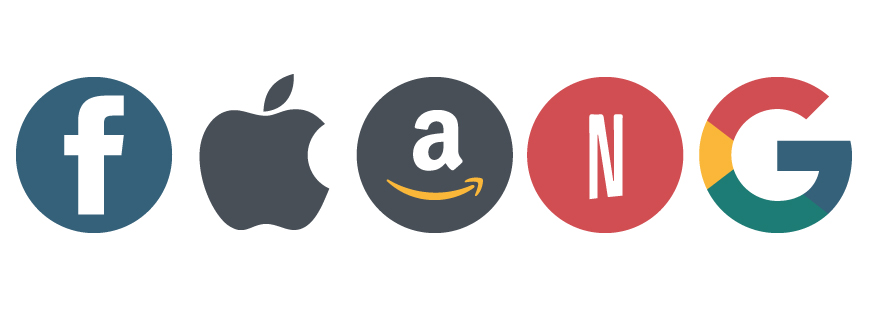

In this notebook we will be looking at data from the stock market, particularly some technology stocks, otherwise known as FAANG stocks. We will learn how to use pandas to get stock information, visualize different aspects of it, and finally we will look at a few ways of analyzing the risk, return, based on its previous performance history. We will also be predicting future stock prices through a Monte Carlo Simulation. Along the way we'll be asking the following questions:

- What was the change in price of the stock over time?
- What was the daily return of the stock on average?
- What was the daily/annual risk of the stocks in the portfolio?
- What was the correlation between different stocks'?
- How much value do we put at risk by investing in a particular stock?
- How can we attempt to predict future stock behavior? (Predicting the closing stock price using Monte Carlo Simulation)

In [1]:
# Importing relevant libraries
import yfinance as yf
import numpy as np
import pandas as pd
import seaborn as sns
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt

In [2]:
# Importing finance data from YFinance API
yf.pdr_override()
# download dataframe
tickers = ['FB', 'AAPL', 'AMZN', 'NFLX', 'GOOG']
start_date = '2017-4-1'
end_date = '2022-4-4'
port = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

[*********************100%***********************]  5 of 5 completed


In [3]:
port.head()

,AAPL,AMZN,FB,GOOG,NFLX
Date,,,,,
2017-03-31,33.859753,44.327000,142.050003,41.478001,147.809998
2017-04-03,33.869179,44.575500,142.279999,41.927502,146.919998
2017-04-04,34.121384,45.341499,141.729996,41.728500,145.500000
2017-04-05,33.944607,45.464001,141.850006,41.570499,143.619995
2017-04-06,33.859753,44.914001,141.169998,41.394001,143.740005


In [4]:
port.describe()

,AAPL,AMZN,FB,GOOG,NFLX
count,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000
mean,80.123107,109.871128,218.853751,76.887053,377.382165
std,44.705115,42.834616,64.826336,31.930668,132.209092
min,33.157379,44.233501,124.059998,41.167500,139.759995
25%,42.285892,80.153503,171.470001,54.124001,291.559998
50%,55.077774,94.214996,191.550003,61.496498,361.410004
75%,122.838196,157.935501,266.720001,89.088501,494.250000
max,181.511703,186.570496,382.179993,150.709000,691.690002


# What was the change in price of the stock over time?

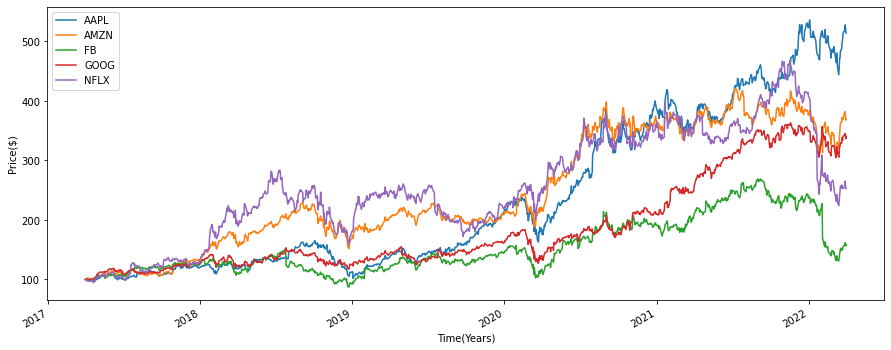

In [5]:
#Normalize the data to 100 and plot the historial price on a graph.
(port / port.iloc[0] * 100).plot(figsize=(15, 6));
plt.xlabel('Time(Years)')
plt.ylabel('Price($)')
plt.show()

The graph above gives us a general overiew of the prices of the stocks in our portfolio overtime. We can see that over the 5 year time period we've selected, `AAPL` has generated the highest overall return whilst `FB`appears to have generated the lowest return in the same time period with `AMZN`, `NFLX` and `GOOG` generating returns in between.

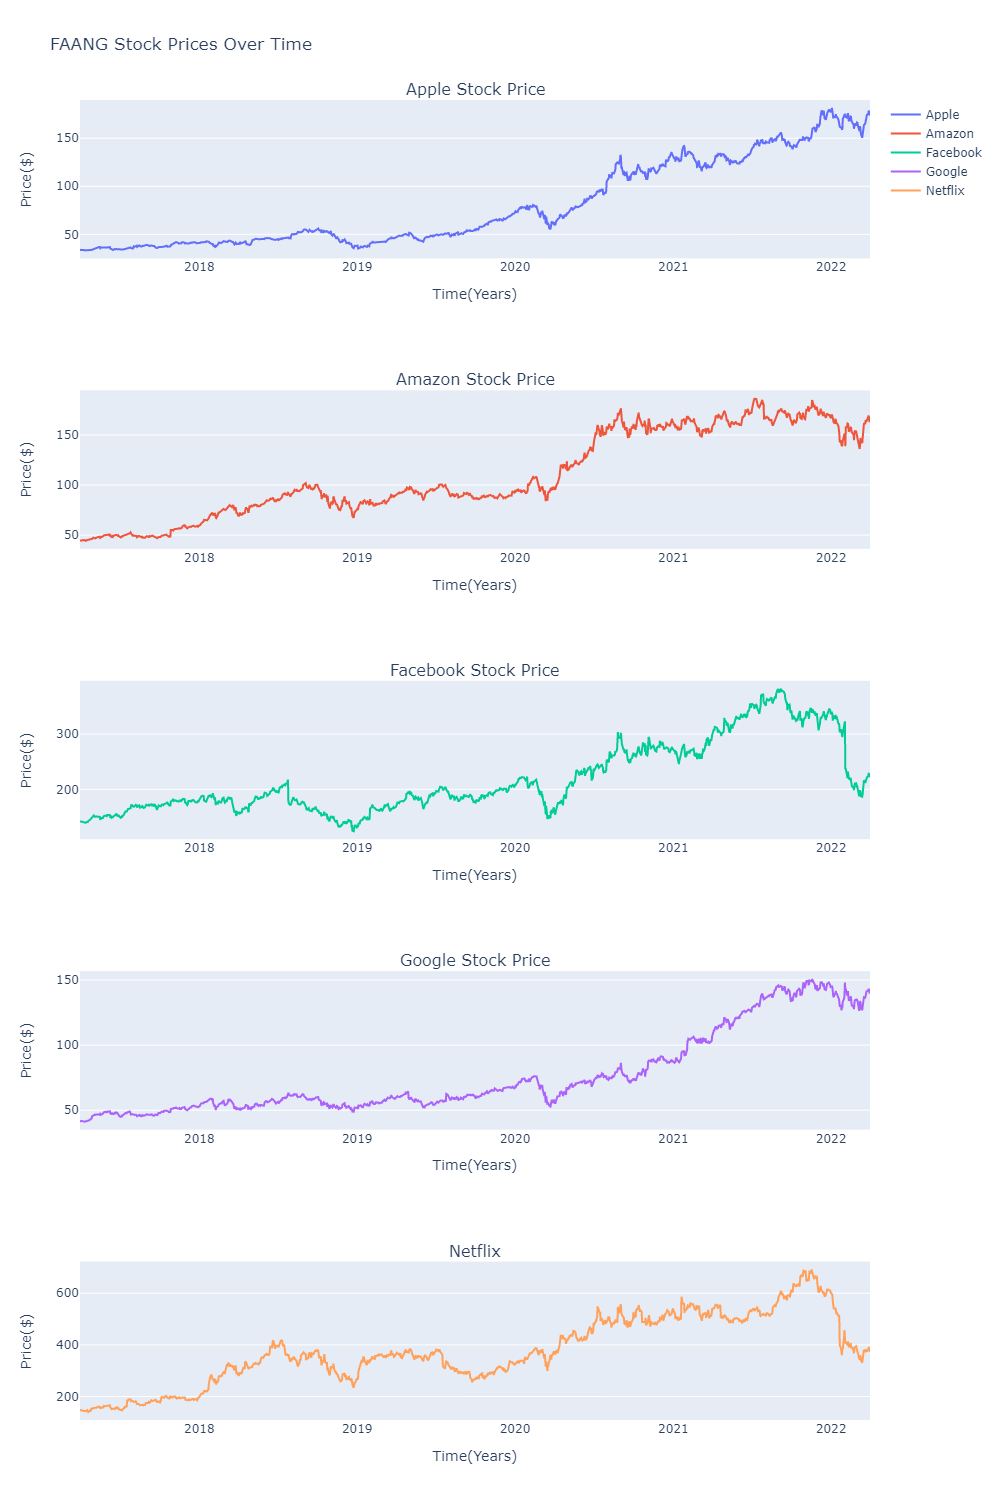

In [6]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Initialize figure with subplots
fig = make_subplots(
    rows=5, cols=1, subplot_titles=("Apple Stock Price", "Amazon Stock Price", "Facebook Stock Price",
                                    "Google Stock Price", 'Netflix')
)

# Add traces

fig.add_trace(go.Scatter(name='Apple', x=(port.index), y=port['AAPL']), row=1, col=1)
fig.add_trace(go.Scatter(name='Amazon', x=port.index, y=port['AMZN']), row=2, col=1)
fig.add_trace(go.Scatter(name='Facebook',x=port.index, y=port['FB']), row=3, col=1)
fig.add_trace(go.Scatter(name='Google', x=port.index, y=port['GOOG']), row=4, col=1)
fig.add_trace(go.Scatter(name='Netflix' ,x=port.index, y=port['NFLX']), row=5, col=1)

# Update xaxis properties
fig.update_xaxes(title_text="Time(Years)", showgrid=False,row=1, col=1)
fig.update_xaxes(title_text="Time(Years)", showgrid=False,row=2, col=1)
fig.update_xaxes(title_text="Time(Years)", showgrid=False, row=3, col=1)
fig.update_xaxes(title_text="Time(Years)", showgrid=False, row=4, col=1)
fig.update_xaxes(title_text="Time(Years)", showgrid=False, row=5, col=1)

# Update yaxis properties
fig.update_yaxes(title_text="Price($)", row=1, col=1)
fig.update_yaxes(title_text="Price($)", row=2, col=1)
fig.update_yaxes(title_text="Price($)", row=3, col=1)
fig.update_yaxes(title_text="Price($)", row=4, col=1)
fig.update_yaxes(title_text="Price($)", row=5, col=1)

# Update title and height
fig.update_layout(title_text="FAANG Stock Prices Over Time", height=1500, width=1000)

fig.show('png')

Next lets calculate the returns and the risk of these stocks as well as the overall return and risk of the portfolio we have

# Calculating the return

The return of a stock is calculated as the (Ending Price – Beginning Price) / (Beginning Price)

In [7]:
port['FB Return'] = (port['FB'] / port['FB'].shift(1)) - 1
port['AMZN Return']= (port['AMZN'] / port['AMZN'].shift(1)) - 1
port['AAPL Return'] = (port['AAPL'] / port['AAPL'].shift(1)) - 1
port['NFLX Return'] = (port['NFLX'] / port['NFLX'].shift(1)) - 1
port['GOOG Return'] = (port['GOOG'] / port['GOOG'].shift(1)) - 1
port[1:].head() #Created a new column showing daily returns of each stock

,AAPL,AMZN,FB,GOOG,NFLX,FB Return,AMZN Return,AAPL Return,NFLX Return,GOOG Return
Date,,,,,,,,,,
2017-04-03,33.869179,44.575500,142.279999,41.927502,146.919998,0.001619,0.005606,0.000278,-0.006021,0.010837
2017-04-04,34.121384,45.341499,141.729996,41.728500,145.500000,-0.003866,0.017184,0.007446,-0.009665,-0.004746
2017-04-05,33.944607,45.464001,141.850006,41.570499,143.619995,0.000847,0.002702,-0.005181,-0.012921,-0.003786
2017-04-06,33.859753,44.914001,141.169998,41.394001,143.740005,-0.004794,-0.012097,-0.002500,0.000836,-0.004246
2017-04-07,33.784336,44.743999,140.779999,41.233501,143.110001,-0.002763,-0.003785,-0.002227,-0.004383,-0.003877


In [8]:
daily_returns = port.iloc[1:, 5:].copy() # Isolated the daily returns of our stock and stored it in a table
daily_returns.describe()

,FB Return,AMZN Return,AAPL Return,NFLX Return,GOOG Return
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000
mean,0.000635,0.001228,0.001490,0.001068,0.001125
std,0.022886,0.019616,0.019508,0.025739,0.017610
min,-0.263901,-0.079221,-0.128647,-0.217905,-0.111008
25%,-0.009129,-0.008075,-0.007472,-0.011554,-0.006230
50%,0.001026,0.001412,0.001176,0.000676,0.001533
75%,0.012459,0.010932,0.011511,0.014325,0.009425
max,0.108164,0.135359,0.119808,0.168543,0.104485


# Plotting the Daily Returns

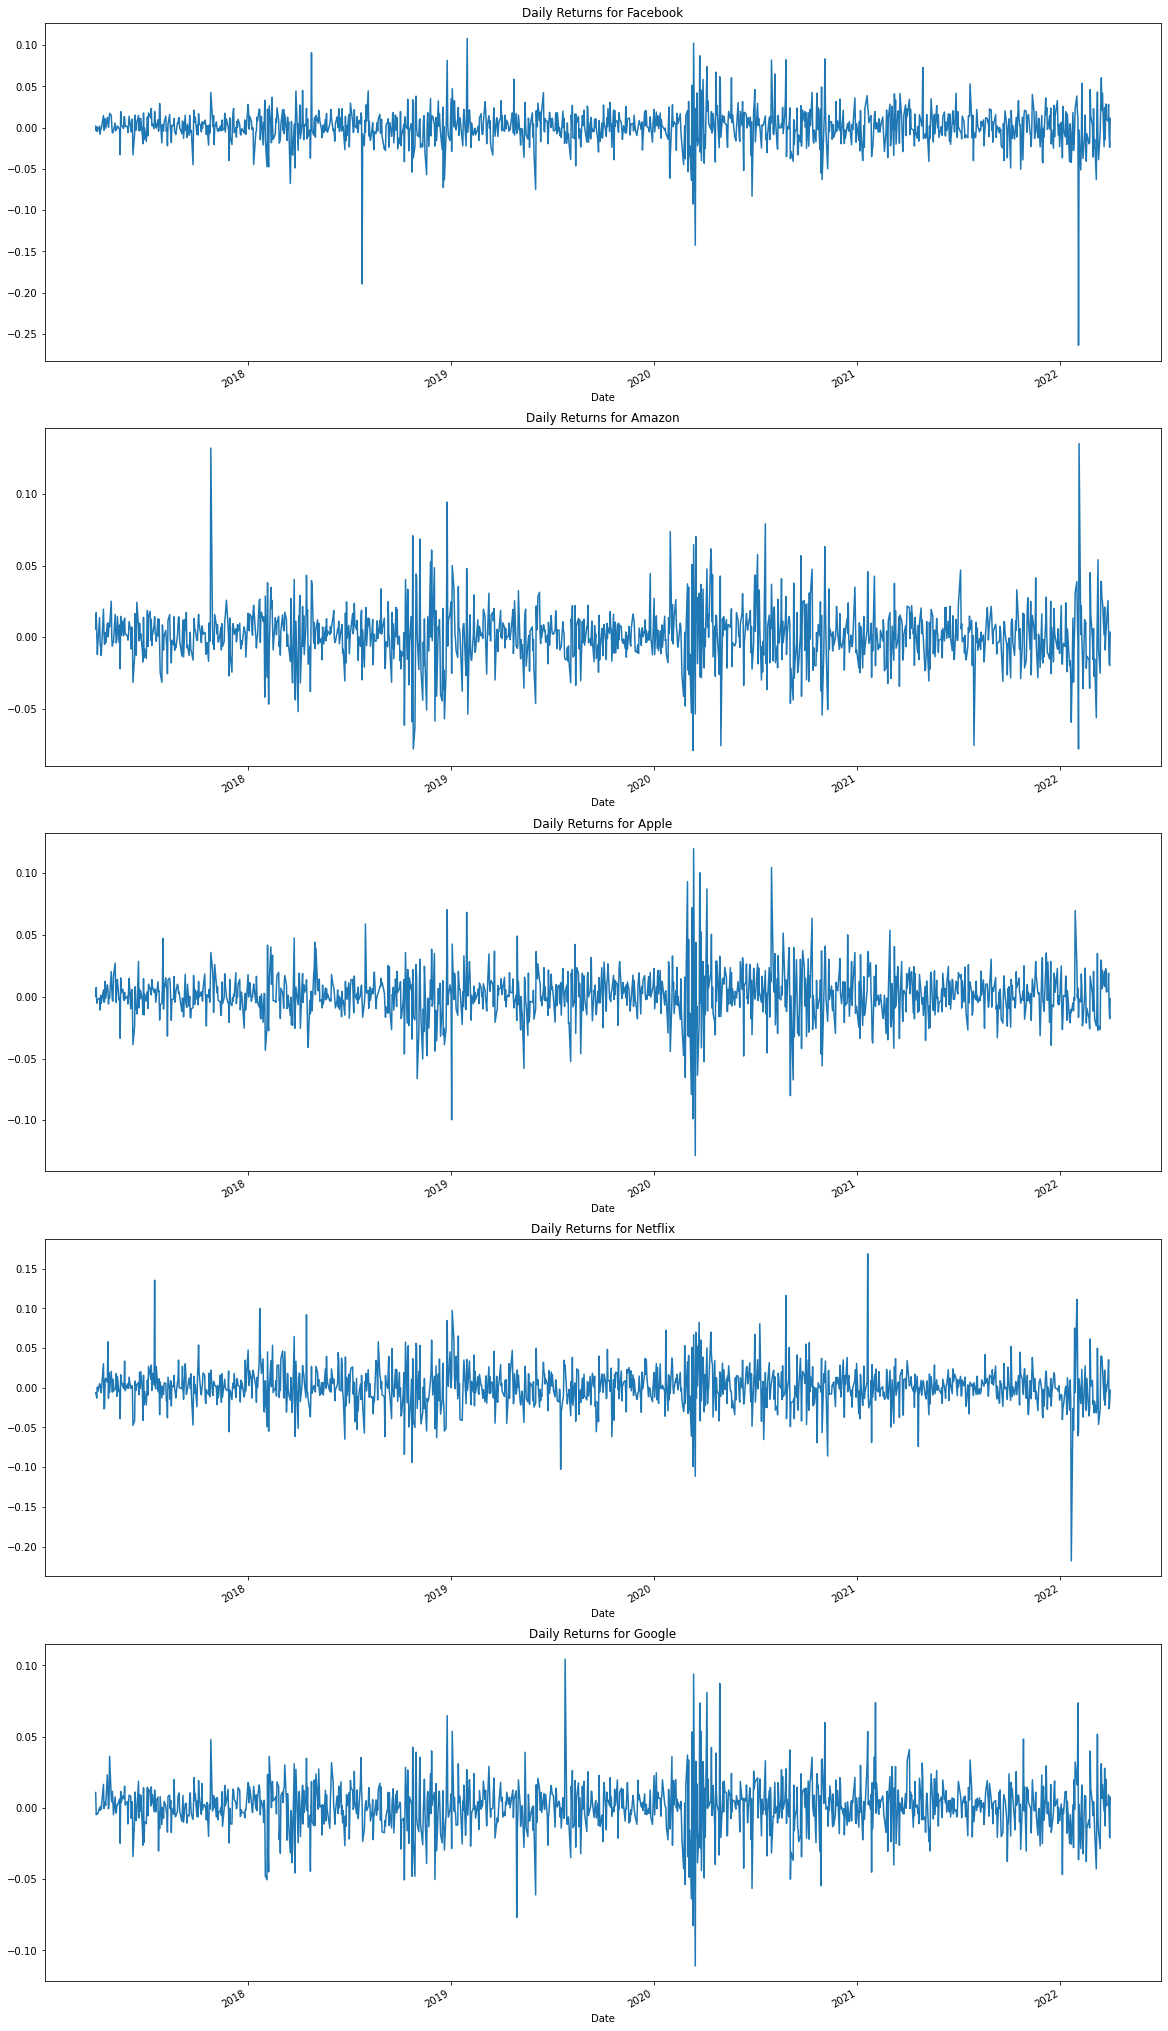

In [9]:
# Creating subplots of the stock returns
plt.figure(figsize=(20, 40))

plt.subplot(5, 1, 1)
port['FB Return'].plot()
plt.title('Daily Returns for Facebook')

plt.subplot(5, 1, 2)
port['AMZN Return'].plot()
plt.title('Daily Returns for Amazon')

plt.subplot(5, 1, 3)
port['AAPL Return'].plot()
plt.title('Daily Returns for Apple')

plt.subplot(5, 1, 4)
port['NFLX Return'].plot()
plt.title('Daily Returns for Netflix')

plt.subplot(5, 1, 5)
port['GOOG Return'].plot()
plt.title('Daily Returns for Google')
plt.show()

## Calculating Annual Returns

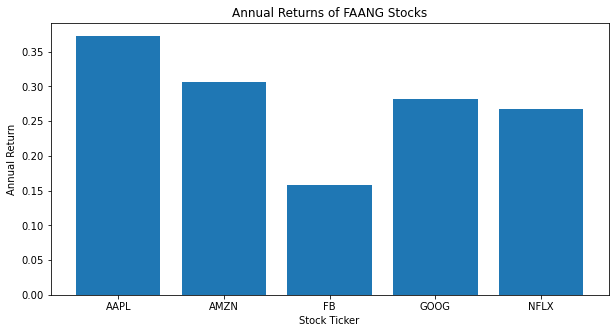

In [57]:
plt.figure(figsize=(10,5))
plt.bar(annual_returns.index, annual_returns)
plt.title('Annual Returns of FAANG Stocks')
plt.xlabel('Stock Ticker')
plt.ylabel('Annual Return')
plt.show()

In [56]:
#Calculating the annual return of the portfolio
returns = (port.iloc[:, :5] / port.iloc[:, :5].shift(1)) - 1
#Assuming each security has equal weights
weights = np.array([0.20, 0.20, 0.20, 0.20, 0.20])
annual_returns = returns.mean() * 250
np.dot(annual_returns, weights)
pfolio_1 = str(round(np.dot(annual_returns, weights), 5) * 100) + ' %'
print ('The annual return of our portfolio is ' + pfolio_1)

The annual return of our portfolio is 27.731 %


# Calculating the volatility

The volatility of a stock can be measure by looking at the standard deviation of a stock. Standard deviation is defined as the deviation of the values or data from an average mean; in this instance the average mean is the return of a stock within a specific time period.

In [12]:
daily_returns

,FB Return,AMZN Return,AAPL Return,NFLX Return,GOOG Return
Date,,,,,
2017-04-03,0.001619,0.005606,0.000278,-0.006021,0.010837
2017-04-04,-0.003866,0.017184,0.007446,-0.009665,-0.004746
2017-04-05,0.000847,0.002702,-0.005181,-0.012921,-0.003786
2017-04-06,-0.004794,-0.012097,-0.002500,0.000836,-0.004246
2017-04-07,-0.002763,-0.003785,-0.002227,-0.004383,-0.003877
...,...,...,...,...,...
2022-03-28,0.007979,0.025593,0.005037,0.012465,0.003028
2022-03-29,0.028042,0.001920,0.019134,0.035164,0.009158
2022-03-30,-0.008744,-0.017801,-0.006649,-0.026415,-0.004227


In [37]:
# Calculating the daily volatility of the stocks
daily_risk = returns[tickers].std() 
daily_risk = str(round(daily_risk, 5) * 100)
print(daily_risk)

FB      2.289
AAPL    1.951
AMZN    1.962
NFLX    2.574
GOOG    1.761
dtype: float64


In [14]:
# Calculating the annual volatility of the stocks
annual_risk = returns[tickers].std() * 250 ** 0.5
annual_risk = str(round(annual_risk, 5) * 100)
print(annual_risk)

FB      36.187
AAPL    30.845
AMZN    31.016
NFLX    40.696
GOOG    27.844
dtype: float64


In [35]:
#Annual variance 
pfolio_var = np.dot(weights.T, np.dot(daily_returns.cov() * 250, weights))
#Annual volatility
pfolio_vol = (np.dot(weights.T, np.dot(daily_returns.cov() * 250, weights))) ** 0.5


The annual volatility of our portfolio is 27.221 %


# Stock Correlation and Covariance

**Covariance** in the context of the stock market measures how the stock prices of two stocks (or more) move together.  The two stocks prices are likely to move in the same direction if they have a positive covariance; likewise, a negative covariance indicates that they two stocks move in opposite direction.

**Correlation** in the context of the stock market describes the relationship that exists between two stocks and their respective price movements. It's important to note that correlation only measures association, but doesn't show if x causes y or vice versa—or if the association is caused by a third factor.
 
 

<AxesSubplot:>

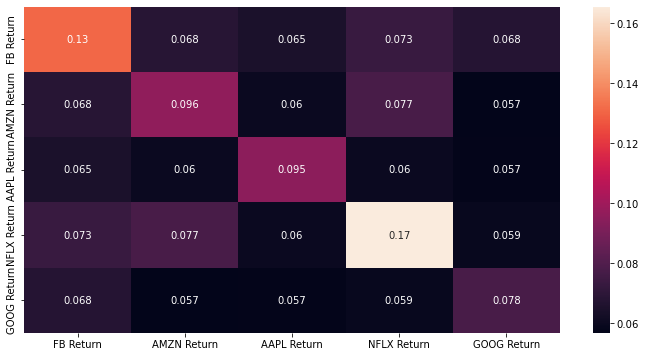

In [15]:
#Annual Covariance matrix of the stock in our portfolio
cov_matrix = daily_returns.cov() * 250 
cov_matrix

plt.figure(figsize=(12,6))
sns.heatmap(cov_matrix, annot=True)

<AxesSubplot:>

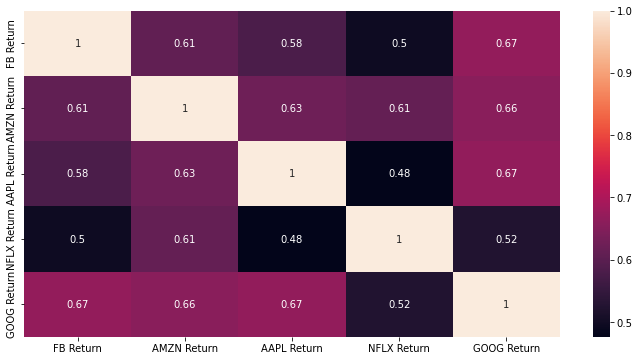

In [16]:
#Annual Correlation of daily returns of the stocks in our portfolio
corr_matrix = daily_returns.corr() 
corr_matrix

plt.figure(figsize=(12,6))
sns.heatmap(corr_matrix, annot=True)

# Logic Behind Monte Carlo Simulations

**How do we predict the daily return of the stock? Brownian Motion.**

- **Brownian motion** will be the main driver for estimating the return. It is a stochastic process used for modeling random behavior over time. Brownian motion has two main components:

  - **Drift** — the direction that rates of returns have had in the past. That is, the expected return of the stock. You may ask yourself: why is the variance multiplied by 0.5? Becasue historical values are eroded in the future.
  - **Volatility** — the historical volatility multiplied by a random, standard normal variable.m

### Computing the logarithmic return and variance of the stock


In [18]:
log_returns = np.log(1 + port['AAPL'].pct_change())
u = log_returns.mean()

In [19]:
var = log_returns.var() 

### Computing the drift of the stock

In [20]:
drift = (u - (0.5 * var))

In [21]:
stdev = log_returns.std() 

### Forecast selection

In [22]:
t_intervals = 250 #No. of day we want to forecast price for
iterations = 10 #No. of outcomes we want to observer

### Calculating the daily returns forecast

In [23]:
from scipy.stats import norm
daily_returns_apple = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, iterations)))
daily_returns_apple

array([[0.96634393, 1.01492714, 0.99643974, ..., 0.9451044 , 1.02416382,
        0.98996242],
       [1.01239784, 0.9904324 , 1.00315221, ..., 0.99454226, 1.00273215,
        0.99466364],
       [0.97483465, 1.02196422, 1.01081296, ..., 0.99114727, 0.99503562,
        0.98595751],
       ...,
       [0.98101629, 1.02011696, 0.99828498, ..., 1.03615562, 1.01023028,
        0.98589366],
       [0.99028582, 1.02177852, 0.98418146, ..., 0.98980645, 0.98933234,
        0.98819011],
       [0.96664179, 1.01885981, 1.00082437, ..., 1.00828608, 1.00700965,
        1.00214673]])

In [24]:
daily_returns_apple.shape

(250, 10)

### Forecasting stock prices

In [25]:
S0 = port['AAPL'].iloc[-1]
S0

174.05426025390625

In [26]:
price_list = np.zeros_like(daily_returns_apple)
price_list # Create a variable price_list with the same dimension as the daily_returns matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [27]:
price_list.shape

(250, 10)

In [28]:
price_list[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [29]:
price_list[0] = S0
price_list #Set the values on the first row of the price_list array equal to S0

array([[174.05426025, 174.05426025, 174.05426025, ..., 174.05426025,
        174.05426025, 174.05426025],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [30]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns_apple[t]

In [31]:
price_list

array([[174.05426025, 174.05426025, 174.05426025, ..., 174.05426025,
        174.05426025, 174.05426025],
       [176.21215699, 172.38897819, 174.60291557, ..., 173.10431722,
        174.52980332, 173.12544346],
       [171.77771592, 176.17536752, 176.49089036, ..., 171.57187185,
        173.66337162, 170.69433067],
       ...,
       [271.71438722, 166.63496399, 336.31155175, ..., 222.44860643,
        190.63674755, 220.28674743],
       [269.07490398, 170.26402608, 330.99159429, ..., 220.18106623,
        188.60309942, 217.68518422],
       [260.0990475 , 173.47517363, 331.26445489, ..., 222.00550416,
        189.92514118, 218.15249528]])

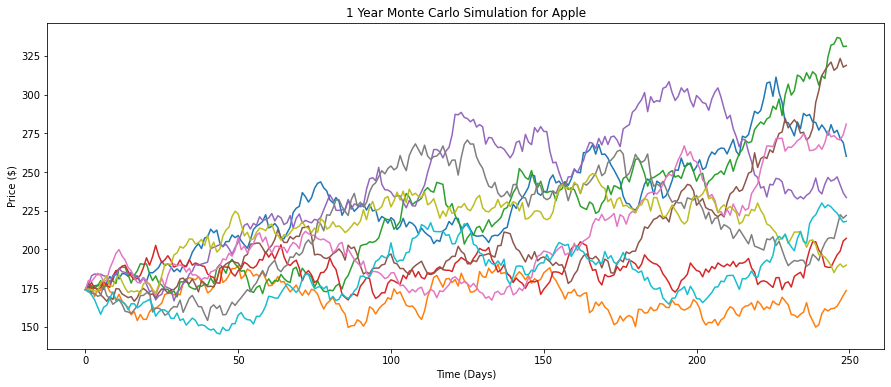

In [32]:
plt.figure(figsize=(15,6)) #Plotting the price forecast we made using the simulation
plt.title('1 Year Monte Carlo Simulation for Apple')
plt.ylabel("Price ($)")
plt.xlabel("Time (Days)")
plt.plot(price_list)
plt.show()

## Extending Prediction Visualisation

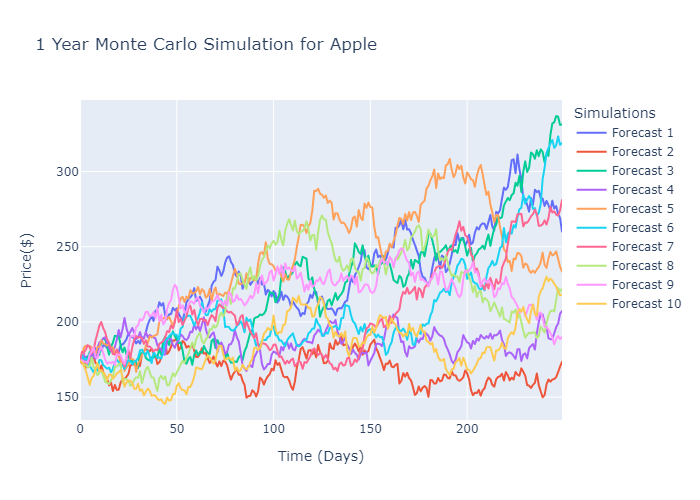

In [33]:
import plotly.express as px
price_list = pd.DataFrame(price_list)
price_list = price_list.set_axis(['Forecast 1', 'Forecast 2',
                                 'Forecast 3', 'Forecast 4',
                                 'Forecast 5', 'Forecast 6',
                                 'Forecast 7', 'Forecast 8',
                                 'Forecast 9', 'Forecast 10'], axis=1, inplace=False)

fig = px.line(data_frame=price_list, 
              x=price_list.index, 
              y=price_list.columns, 
              labels={'value': 'Price($)',
                     'index': 'Time (Days)',
                     'variable':'Simulations '}, 
              title='1 Year Monte Carlo Simulation for Apple'
              )
fig.show('png')

In [34]:
price_list.describe()

,Forecast 1,Forecast 2,Forecast 3,Forecast 4,Forecast 5,Forecast 6,Forecast 7,Forecast 8,Forecast 9,Forecast 10
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,230.836628,168.994430,224.693933,186.440875,241.263568,207.810388,207.721294,215.287673,215.912962,183.237631
std,31.614687,10.289285,42.210825,7.998288,37.562108,35.231489,31.324834,34.161770,18.450166,19.937770
min,171.777716,149.613346,169.362379,167.404617,166.785590,166.541662,167.215387,154.129369,171.279265,145.416241
25%,209.043181,161.259218,183.660609,180.688730,218.025062,187.714505,181.713102,188.535273,206.747464,168.136664
50%,227.970029,167.706535,226.736909,186.770089,241.609117,195.987152,199.526191,222.034568,220.185831,182.561470
75%,252.554794,178.099492,247.749020,191.269861,270.689173,219.041896,225.299445,242.436009,228.681301,196.636531
max,311.298192,190.550367,336.889324,207.187773,308.364184,323.324510,280.963434,270.667119,249.003893,230.028809


The Monte Carlo simulations we've built are ideally used as a guide when forecasting stock prices into the future. The reason this is the case is because of several drawbacks of using a Monte Carlo simualtion. Its greatest disadvantage in the sense that assumptions need to be fair because the output is only as good as the inputs. Another great disadvantage is that the Monte Carlo simulation tends to underestimate the probability of extreme bear events like a financial crisis. Ceteris paribus, the Monte Carlo Simulation may be a somewhat valuable method in forecasting the price of stocks. However, there are much more advance methods to predict the stock price.#